## Assignment no 36

In [1]:
import numpy as np
from scipy import stats

In [2]:
'''Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation
of 5 using Python. Interpret the results.'''

sample_mean = 50
sample_std = 5
sample_size = 100
confidence_interval = 0.95

std_error = sample_std/np.sqrt(sample_size)
print(f"The standard error is {std_error}.\n")

dof = sample_size - 1
print(f"The degree of freedom is {dof}.\n")

t_value = stats.t.ppf(0.975, dof)
print(f"The t statistics value is {t_value:.4f}.\n")

Lower_CI = sample_mean - t_value * std_error
Upper_CI = sample_mean + t_value * std_error
print(f"Interpretation : The 95% confidence interval lies between {Lower_CI:.2f} and {Upper_CI:.2f}")

The standard error is 0.5.

The degree of freedom is 99.

The t statistics value is 1.9842.

Interpretation : The 95% confidence interval lies between 49.01 and 50.99


In [3]:
Lower_CI = stats.t.ppf(0.025, sample_size - 1, loc = sample_mean, scale = sample_std)
Upper_CI = stats.t.ppf(0.975, sample_size - 1, loc = sample_mean, scale = sample_std)
print(f"Interpretation : The 95% confidence interval lies between {Lower_CI:.2f} and {Upper_CI:.2f}")

Interpretation : The 95% confidence interval lies between 40.08 and 59.92


In [4]:
'''Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag
matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20%
brown. Use Python to perform the test with a significance level of 0.05.

Ans - There are approximately 255 M&Ms in a cup (8 oz) so we are considering ~300 M&Ms as population. '''

significance_value = 0.05
confidence_interval = 1 - significance_value

In [5]:
observed_color_distribution = np.array([56, 44, 47, 62, 53, 38])
expected_color_distribution = np.array([0.2, 0.2, 0.2, 0.1, 0.1, 0.2]) * sum(observed_color_distribution)

In [6]:
chi2, p = stats.chisquare(observed_color_distribution, expected_color_distribution)

In [7]:
dof= len(expected_color_distribution)-1
critical_value=stats.chi2.ppf(confidence_interval,dof)
critical_value, dof

(11.070497693516351, 5)

In [8]:
print(f"chi-square statistic = {chi2:.2f}")
print(f"p-value = {p:.4f}")

chi-square statistic = 67.18
p-value = 0.0000


In [9]:
if chi2 > critical_value:
    print("Reject the null hypothesis")
else:
    print("Failed to reject null hypothsis")

Reject the null hypothesis


In [10]:
'''Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following
data:

            Group A     Group B

Outcome 1      20          15
Outcome 2      10          25
Outcome 3      15          20
 
Interpret the results of the test.'''

group_A = [20,10,15]
group_B = [15,25,20]

In [11]:
sum(group_A) == sum(group_B)

False

In [12]:
observed = np.array([[20, 15], [10, 25], [15, 20]])

In [13]:
chisquare_test, p_value, dof, expected= stats.chi2_contingency(observed)

In [14]:
if p_value > 0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject null hypothsis")        

Reject the null hypothesis


In [21]:
'''Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals
smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the
population who smoke.'''

import statsmodels.stats.proportion as proportion

#number of individuals who smoked
smokers = 60

#total number of individuals
sample_size = 500

# estimate of the proportion of smokers in the population
p_hat = smokers / sample_size

# calculate the confidence interval
conf_int = proportion.proportion_confint(count=smokers, nobs=sample_size, alpha=0.05)

# print the results
print(f"The 95% confidence interval for the true proportion of smokers in the population is [{conf_int[0]:.2f}, {conf_int[1]:.2f}]")

The 95% confidence interval for the true proportion of smokers in the population is [0.09, 0.15]


In [7]:
'''Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation
of 12 using Python. Interpret the results.'''

import scipy.stats as stats
import numpy as np

sample_mean = 75
sample_std = 12
sample_size = 100 #assumed
confidence_interval = 0.90

std_error = sample_std/np.sqrt(sample_size)
print(f"The standard error is {std_error}.\n")

dof = sample_size - 1
print(f"The degree of freedom is {dof}.\n")

t_value = stats.t.ppf(0.95, dof)
print(f"The t statistics value is {t_value:.4f}.\n")

Lower_CI = sample_mean - t_value * std_error
Upper_CI = sample_mean + t_value * std_error
print(f"Interpretation : The 90% confidence interval lies between {Lower_CI:.2f} and {Upper_CI:.2f}")

The standard error is 1.2.

The degree of freedom is 99.

The t statistics value is 1.6604.

Interpretation : The 90% confidence interval lies between 73.01 and 76.99


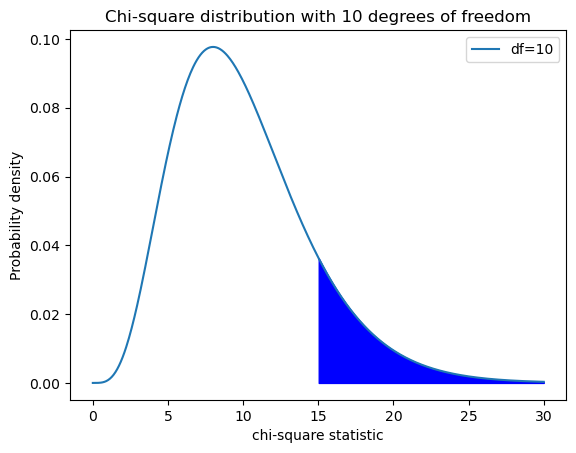

In [6]:
'''Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the
area corresponding to a chi-square statistic of 15.'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

df = 10

#create the x-axis values for the plot
x = np.linspace(0, 30, 500)

#create the chi-square distribution
chi = chi2(df)

plt.plot(x, chi.pdf(x), label=f'df={df}')

# shade the area corresponding to a chi-square statistic of 15
x_shade = np.linspace(15, 30, 500)
y_shade = chi.pdf(x_shade)
plt.fill_between(x_shade, y_shade, where=x_shade > 15, color='blue')
plt.xlabel('chi-square statistic')
plt.ylabel('Probability density')
plt.title(f'Chi-square distribution with {df} degrees of freedom')
plt.legend()
plt.show()

In [11]:
'''Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520
preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who
prefer Coke.'''

import statsmodels.stats.proportion as proportion

#number of individuals who smoked
coke = 520

#total number of individuals
sample_size = 1000

# estimate of the proportion of smokers in the population
prob_coke = coke / sample_size

# calculate the confidence interval
conf_int = proportion.proportion_confint(count=coke, nobs=sample_size, alpha=0.01)

# print the results
print(f"The 99% confidence interval for the true proportion of smokers in the population is [{conf_int[0]:.3f}, {conf_int[1]:.3f}]")

The 99% confidence interval for the true proportion of smokers in the population is [0.479, 0.561]


In [ ]:
Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe
45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the
expected frequencies of a fair coin. Use a significance level of 0.05.

Ans - n = 100, categories = 2

1. Null Hypothesis Ho : Coin is Fair
   Alternate Hypothesis Ha : Coin is Biased towards Tail (One tailed test)
    
2. α = 0.05 , C.I. = 1 - α = 0.95

3. Degree of Freedom = categories - 1 = 2 - 1 = 1

4. Decision Boundary:
        From chi-square table, critical value = 3.841

5. Calculating X**2 statistics-
    X**2 = Σ(Observed - Expected)**2 / Expected
         = (55-50)**2/50 + (45-50)**2/50
         = 1
            
6. X**2 < critical value, HEnce we fail to reject the NUll Hypothesis Ho.

In [ ]:
Q9. A study was conducted to determine if there is an association between smoking status (smoker or
non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below.
Conduct a chi-square test for independence to determine if there is a significant association between
smoking status and lung cancer diagnosis.

            Lung Cancer: Yes         Lung Cancer: No

Smoker             60                       140
Non-smoker         30                       170


Use a significance level of 0.05.

Ans - n = 100, categories = 2

1. Null Hypothesis Ho : No association between smoking and cancer.
   Alternate Hypothesis Ha : Association between smoking and cancer. (One tailed test)
    
2. α = 0.05 , C.I. = 1 - α = 0.95

3. Observed values - 
                    Lung Cancer: Yes         Lung Cancer: No

        Smoker             60                       140            = 200
        Non-smoker         30                       170            = 200 
                        ---------                ----------       ----------
                           90                        310            400
            
   Expected values - 
                    Lung Cancer: Yes         Lung Cancer: No

        Smoker             45                       155            = 200
        Non-smoker         45                       155            = 200
                        ---------                ----------       ----------
                           90                        310            400
            

4. Degree of Freedom = (rows - 1) * (columns - 1) = (2 - 1) * (2 - 1)= 1

5. Decision Boundary:
        From chi-square table, critical value = 3.841

6. Calculating X**2 statistics-
    X**2 = Σ(Observed - Expected)**2 / Expected
         = (60-45)**2/45 + (140-155)**2/155 + (30-45)**2/45 + (170-155)**2/155
         = 12.9
            
6. X**2 > critical value, Hence we reject the Null Hypothesis Ho.

In [ ]:
Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark
chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from
the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the
contingency table below. Conduct a chi-square test for independence to determine if there is a significant
association between chocolate preference and country of origin.

             Milk Chocolate   Dark Chocolate   White Chocolate

U.S. (n=500)      200              150               150
U.K. (n=500)      225              175               100


Use a significance level of 0.01.

Ans - n = 500,

1. Null Hypothesis Ho : No association between smoking and cancer.
   Alternate Hypothesis Ha : Association between smoking and cancer. (One tailed test)
    
2. α = 0.05 , C.I. = 1 - α = 0.95

3. Observed values - 
                             Milk Chocolate   Dark Chocolate   White Chocolate

                U.S. (n=500)      200              150               150         = 500
                U.K. (n=500)      225              175               100         = 500
                               ---------        ----------       ----------     -------
                                  425              325               250          1000
   Expected values - 
                             Milk Chocolate   Dark Chocolate   White Chocolate

                U.S. (n=500)      212.5           162.5             125          = 500
                U.K. (n=500)      212.5           162.5             125         = 500
                               ---------        ----------       ----------     -------
                                  425              325               250          1000
              

4. Degree of Freedom = (rows - 1) * (columns - 1) = (2 - 1) * (3 - 1)= 2

5. Decision Boundary:
        From chi-square table, critical value = 9.210

6. Calculating X**2 statistics-
    X**2 = Σ(Observed - Expected)**2 / Expected
         = 13.394
            
6. X**2 > critical value, Hence we reject the Null Hypothesis Ho.

In [ ]:
Q11. A random sample of 30 people was selected from a population with an unknown mean and standard
deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10.
Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a
significance level of 0.05.

Ans - n = 30 , 

1. Null Hypothesis Ho : μ = 70
   Alternate Hypothesis Ha : μ != 70 (Two tailed test)
    
2. α = 0.05 , C.I. = 1 - α = 0.95

3. t-value = 1.095

4. Degree of Freedom = n - 1 = 30 - 1 = 29

5. Decision Boundary:
        From t-table, critical value = +/- 2.045
            
6. t-value < critical value, Hence we fail to reject the Null Hypothesis Ho.